In [1]:
!pip install tweepy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tweepy as tw # To extarct the twitter data
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# API credentials here
consumer_api_key = "Le1X93m9gqPt3JKyTZh41LGnj"
consumer_api_secret ="x8SG2tqdQgdbKvFysbVwdgMCGQ01pvIPec5jeGjuWJHbVO4sVp"
access_token= "767233969050050560-CC9ZWo3OOqkBHIGjdMICroiZ9prY7Ol"
access_token_secret ="msHCRiePw1Bthwg2F0fjFZOjpkkld98ktAEPlrKWl7TBR"

In [3]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
search_words = "#marvel -filter:retweets" #Type you keywork here instead of #covidvaccine
#You can fix a time frame with the date since and date until parameters
#date_since = "2021-12-01"

# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since_id="2022-12-01",
              count = 300,
                   
              ).items(15000) #We instruct the cursor to return maximum of 7500 tweets

In [5]:
tweets_copy = []
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

14014it [02:57, 79.00it/s]


In [6]:
print(f"New tweets retrieved: {len(tweets_copy)}")

New tweets retrieved: 14014


In [7]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'Tweets': tweet.text, 
                                               'Tweet_id': tweet.id,\
                                               'User': tweet.user.name,
                                               'User_id': tweet.user.id,
                                               'User_statuses_count': tweet.user.statuses_count,
                                               'User_followers': tweet.user.followers_count,
                                               'user_friends_count': tweet.user.friends_count,
                                               'User_location': tweet.user.location,
                                               'fav_count': tweet.favorite_count,
                                               'rt_count': tweet.retweet_count, 
                                               'tweet_date': tweet.created_at,
                                               'User_verified': tweet.user.verified,
                                               }, index=[0]))

100%|██████████| 14014/14014 [00:40<00:00, 350.16it/s]


In [8]:
df = tweets_df

In [9]:
df.head()

,Tweets,Tweet_id,User,User_id,User_statuses_count,User_followers,user_friends_count,User_location,fav_count,rt_count,tweet_date,User_verified
0,@kucoincom I think you guys should renegade li...,1626595101358309379,Randy Chavez ⭕,1256260317732057090,16155,14408,645,"Massapequa, NY",0,0,2023-02-17 14:51:07,False
0,❤️ #gotggame #Marvel #BlackFriday #ValentinesD...,1626594974388346888,Apollo377,1579924972327571457,419,18,504,,0,0,2023-02-17 14:50:37,False
0,Leaks👉 RDJ might return as ironman in ironhear...,1626594953588785159,uzumaki,1558437192338665473,12,2,9,,0,0,2023-02-17 14:50:32,False
0,🙉🙉 #marvel \nSource: https://t.co/Pku1Qj6AEY ...,1626594891995418626,Cynthia Johnson,1583356392773017600,390,5,3,,0,0,2023-02-17 14:50:17,False
0,Epic Anthology #1\nApril 2004\nby Jason Hender...,1626594837230411784,The Collection Supreme,1516458474577747974,318,54,26,,0,0,2023-02-17 14:50:04,False


In [10]:
df.tail()

,Tweets,Tweet_id,User,User_id,User_statuses_count,User_followers,user_friends_count,User_location,fav_count,rt_count,tweet_date,User_verified
0,LEGO Marvel Super Heroes Venom 76187\n👀 Now $6...,1622988051038498818,Online Shopping Deals by Daniel,19772442,16047,977,570,"Colorado Springs, CO",0,1,2023-02-07 15:57:59,False
0,Check out #XMEN #WHITEQUEEN #EMMAFROST X-MEN 8...,1622986793061699585,John Eric Buckley,2332465080,76455,1948,3946,Louisville Kentucky,1,1,2023-02-07 15:52:59,False
0,Doom is a good director. She made sure the cam...,1622985341513658369,Spider-Menace,3355881886,4338,799,646,"Florida, USA",17,0,2023-02-07 15:47:13,False
0,I'm going Live on @YouTube playing #hogwartsl...,1622982686863138823,DadPadGaming,1296091627824525312,3201,131,462,,5,2,2023-02-07 15:36:40,False
0,https://t.co/2q8O2no2SJ\n20% Off Deep Discount...,1622980535101554689,TECSONAR,1575663871892762625,677,46,1121,New York,0,0,2023-02-07 15:28:07,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14014 entries, 0 to 0
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tweets               14014 non-null  object        
 1   Tweet_id             14014 non-null  int64         
 2   User                 14014 non-null  object        
 3   User_id              14014 non-null  int64         
 4   User_statuses_count  14014 non-null  int64         
 5   User_followers       14014 non-null  int64         
 6   user_friends_count   14014 non-null  int64         
 7   User_location        14014 non-null  object        
 8   fav_count            14014 non-null  int64         
 9   rt_count             14014 non-null  int64         
 10  tweet_date           14014 non-null  datetime64[ns]
 11  User_verified        14014 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(7), object(3)
memory usage: 1.3+ MB


In [12]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [13]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(https?:\/\/.*[\r\n]*)', ' ', tweet).split())

In [14]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return '2'
    elif analysis.sentiment.polarity == 0:
        return '4'
    else:
        return 0

In [15]:
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df['Sentiment'] = df['clean_tweet'].apply(lambda x: analyze_sentiment(x))

In [16]:
df.head()

,Tweets,Tweet_id,User,User_id,User_statuses_count,User_followers,user_friends_count,User_location,fav_count,rt_count,tweet_date,User_verified,clean_tweet,Sentiment
0,@kucoincom I think you guys should renegade li...,1626595101358309379,Randy Chavez ⭕,1256260317732057090,16155,14408,645,"Massapequa, NY",0,0,2023-02-17 14:51:07,False,I think you guys should renegade list OMI Whoe...,4
0,❤️ #gotggame #Marvel #BlackFriday #ValentinesD...,1626594974388346888,Apollo377,1579924972327571457,419,18,504,,0,0,2023-02-17 14:50:37,False,gotggame Marvel BlackFriday ValentinesDay YouG...,4
0,Leaks👉 RDJ might return as ironman in ironhear...,1626594953588785159,uzumaki,1558437192338665473,12,2,9,,0,0,2023-02-17 14:50:32,False,Leaks RDJ might return as ironman in ironheart...,4
0,🙉🙉 #marvel \nSource: https://t.co/Pku1Qj6AEY ...,1626594891995418626,Cynthia Johnson,1583356392773017600,390,5,3,,0,0,2023-02-17 14:50:17,False,marvel Source,4
0,Epic Anthology #1\nApril 2004\nby Jason Hender...,1626594837230411784,The Collection Supreme,1516458474577747974,318,54,26,,0,0,2023-02-17 14:50:04,False,Epic Anthology 1 April 2004 by Jason Henderson...,2


In [17]:
print(df['Sentiment'].unique())
df['Sentiment'] = df['Sentiment'].astype(int)
print(df['Sentiment'].unique())
print(df['Sentiment'].value_counts())

['4' '2' 0]
[4 2 0]
4    6633
2    6129
0    1252
Name: Sentiment, dtype: int64


In [18]:
all_tweets = ' '.join(tweet for tweet in df['clean_tweet'])

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)

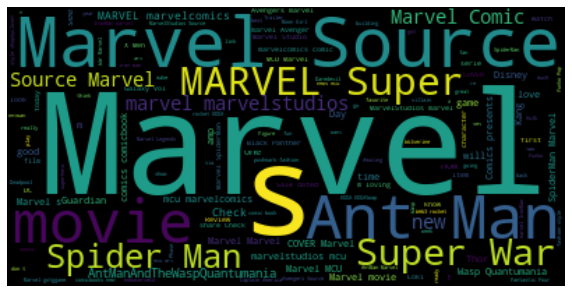

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

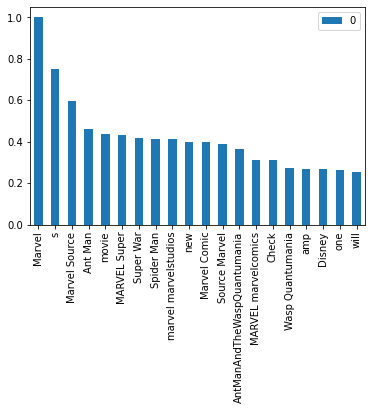

In [21]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()

In [22]:
print(df['User_location'].unique())

['Massapequa, NY' '' 'Chicago, IL' ... 'earths 1-5' 'Oaksterdam'
 'Colorado Springs, CO']


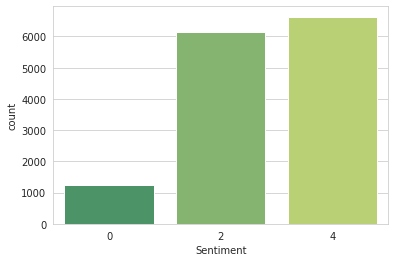

In [23]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='Sentiment',data=df, palette='summer')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14014 entries, 0 to 0
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tweets               14014 non-null  object        
 1   Tweet_id             14014 non-null  int64         
 2   User                 14014 non-null  object        
 3   User_id              14014 non-null  int64         
 4   User_statuses_count  14014 non-null  int64         
 5   User_followers       14014 non-null  int64         
 6   user_friends_count   14014 non-null  int64         
 7   User_location        14014 non-null  object        
 8   fav_count            14014 non-null  int64         
 9   rt_count             14014 non-null  int64         
 10  tweet_date           14014 non-null  datetime64[ns]
 11  User_verified        14014 non-null  bool          
 12  clean_tweet          14014 non-null  object        
 13  Sentiment            14014 non-null

In [25]:
df['User_statuses_count'] = df['User_statuses_count'].astype(int)
df['User_followers'] = df['User_followers'].astype(int)
df['user_friends_count'] = df['user_friends_count'].astype(int)
df['rt_count'] = df['rt_count'].astype(int)
df['fav_count'] = df['fav_count'].astype(int)
df['tweet_date_mod'] = pd.to_datetime(df['tweet_date'], format = ['%D/%M/%Y:%H:%M:%S'])
df = df.drop(['tweet_date'], axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14014 entries, 0 to 0
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tweets               14014 non-null  object        
 1   Tweet_id             14014 non-null  int64         
 2   User                 14014 non-null  object        
 3   User_id              14014 non-null  int64         
 4   User_statuses_count  14014 non-null  int64         
 5   User_followers       14014 non-null  int64         
 6   user_friends_count   14014 non-null  int64         
 7   User_location        14014 non-null  object        
 8   fav_count            14014 non-null  int64         
 9   rt_count             14014 non-null  int64         
 10  User_verified        14014 non-null  bool          
 11  clean_tweet          14014 non-null  object        
 12  Sentiment            14014 non-null  int64         
 13  tweet_date_mod       14014 non-null

In [27]:
print(df['User_statuses_count'].unique())
print(df['User_statuses_count'].value_counts())

[16155   419    12 ... 16500 16047  3201]
5460     223
9211     206
42717    194
437      111
418       85
        ... 
5555       1
53832      1
3338       1
11829      1
3201       1
Name: User_statuses_count, Length: 3967, dtype: int64


In [28]:
print(df['fav_count'].unique())
print(df['fav_count'].value_counts())

[   0    1    2    4    7    5    3   32    8   27    6   35   26  178
   14   12   11   29   17  350   46   13   73   20    9   55   33   16
  158   15   18   97  391   10   31   28   25  675   22   38   24   49
  118   37  161   48  876   39  175   56   19  262   42   34  955  268
  367  156   40   43   69  371   53   63   47  630   21  911   59  150
  108   51   41   36  128  109  117   30   90  685   75   60  320  152
  110  322   61  170  231  550  224   44  104   72   82  533  141  199
  311   58   57  900 1841 1075  976  220   85   96  192 2596   64   84
   74  103   62   79 1373  342  135  145  293   66   50   93   91  388
 1651 2491   76  356   23   68  259   71  179   77  405   81  105  291
   52   54   99   67 2367  247  101 1009 1170  127  173   83  193  169
  200  266  100   65  123  142  184  656  358  450  147  215  590  961
  315  577 1130  111  102  113  734  398  191  267 3136  242  584  805
   45  568   88   87 1418  107  516  256 1789  331 1203  237  137  313
  218 

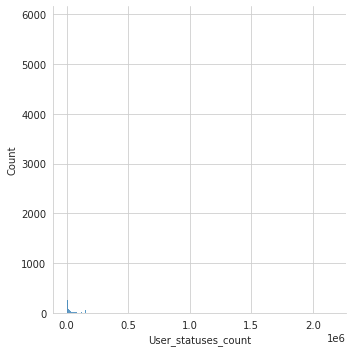

In [29]:
import seaborn as sns
dg = sns.displot(df["User_statuses_count"].dropna())

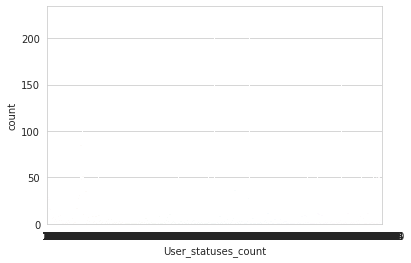

In [30]:
dg = sns.countplot(data = df, x = 'User_statuses_count')
plt.show()

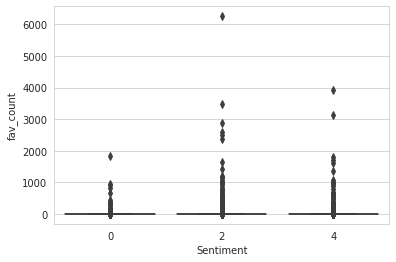

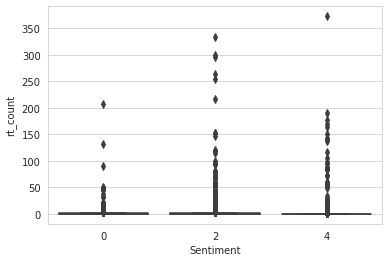

In [31]:
ax = sns.boxplot(x='Sentiment', y = 'fav_count', data = df)
plt.show()

ax = sns.boxplot(x='Sentiment', y='rt_count', data = df)
plt.show()

In [36]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#import pyspark modules
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer, StopWordsRemover
#create Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local") \
    .appName("Sentiment analysis") \
    .config("spark.executor.memory", "6gb") \
    .getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark

In [39]:
tweets_csv = spark.createDataFrame(df)
tweets_csv.printSchema()
tweets_csv.show(truncate=False, n=5)

root
 |-- Tweets: string (nullable = true)
 |-- Tweet_id: long (nullable = true)
 |-- User: string (nullable = true)
 |-- User_id: long (nullable = true)
 |-- User_statuses_count: long (nullable = true)
 |-- User_followers: long (nullable = true)
 |-- user_friends_count: long (nullable = true)
 |-- User_location: string (nullable = true)
 |-- fav_count: long (nullable = true)
 |-- rt_count: long (nullable = true)
 |-- User_verified: boolean (nullable = true)
 |-- clean_tweet: string (nullable = true)
 |-- Sentiment: long (nullable = true)
 |-- tweet_date_mod: timestamp (nullable = true)

+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------+----------------------+-------------------+-------------------+--------------+------------------+--------------+---------+--------+-------------+-------------------------------------------------------------------------------------------------

In [40]:
tweets_csv.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Tweets,14014,None,None,"""#Marvel: #AgeofHeroes is a game of mutant tea...",🫡Congrats. The amount of #MCU fans self-owning...
Tweet_id,14014,1.6249044801099072E18,1.0534379190277288E15,1622980535101554689,1626595101358309379
User,14014,7.118794356907852E14,6.659022372599954E14,#EarnTV,🪐𝓩𝓲 𝕏 𝕧𝕖𝕟𝕦𝕤🪐
User_id,14014,9.4302593132710093E17,6.6164001657897651E17,738693,1626533672114331648
User_statuses_count,14014,23370.290780647923,78363.64045246365,1,2159470
User_followers,14014,11736.205936920223,185245.66287570065,0,13120586
user_friends_count,14014,961.4851576994434,3079.35803506426,0,205776
User_location,14014,5441.857142857143,11986.089067867682,,🦇Gotham🦇
fav_count,14014,10.869416297987726,105.30963376270927,0,6260


In [41]:
print("avg: " + str(tweets_csv.select(avg("fav_count")).collect()[0][0]))

avg: 10.869416297987726


In [42]:
tweets_csv.select(collect_list("User_location")).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [43]:
tweets_csv.select(kurtosis("User_statuses_count")).show(truncate=False)

+-----------------------------+
|kurtosis(User_statuses_count)|
+-----------------------------+
|118.32010674647124           |
+-----------------------------+



In [44]:
tweets_csv.select(max("user_friends_count")).show(truncate=False)
tweets_csv.select(min("user_friends_count")).show(truncate=False)

+-----------------------+
|max(user_friends_count)|
+-----------------------+
|205776                 |
+-----------------------+

+-----------------------+
|min(user_friends_count)|
+-----------------------+
|0                      |
+-----------------------+



In [45]:
tweets_csv.select(mean("User_followers")).show(truncate=False)
tweets_csv.select(skewness("User_followers")).show(truncate=False)

+-------------------+
|avg(User_followers)|
+-------------------+
|11736.205936920223 |
+-------------------+

+------------------------+
|skewness(User_followers)|
+------------------------+
|43.74231102426925       |
+------------------------+



In [46]:
tweets_csv.select(sum("rt_count")).show(truncate=False)
tweets_csv.select(sumDistinct("rt_count")).show(truncate=False)

+-------------+
|sum(rt_count)|
+-------------+
|19758        |
+-------------+



/usr/local/lib/python3.8/dist-packages/pyspark/sql/functions.py:316: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+----------------------+
|sum(DISTINCT rt_count)|
+----------------------+
|7461                  |
+----------------------+



In [47]:
#selecting clean_tweets and Sentiment Label variables
data = tweets_csv.select("clean_tweet", col("Sentiment").cast("Int").alias ("label"))
data.show(truncate = False, n=10)

+-----------------------------------------------------------------------------------------------------------------+-----+
|clean_tweet                                                                                                      |label|
+-----------------------------------------------------------------------------------------------------------------+-----+
|I think you guys should renegade list OMI Whoever is 1st to list them will get a ton of volume People            |4    |
|gotggame Marvel BlackFriday ValentinesDay YouGotThis Source                                                      |4    |
|Leaks RDJ might return as ironman in ironheart series in ai form Marvel MarvelStudios                            |4    |
|marvel Source                                                                                                    |4    |
|Epic Anthology 1 April 2004 by Jason Henderson and Greg Scott doctorstrange doctor strange drstrange marvel      |2    |
|marvel Source          

In [48]:
#divide data, 70% for training, 30% for testing
dividedData = data.randomSplit ( [0.7, 0.3])
trainingData = dividedData [0] #index 0 = data training
testingData =  dividedData[1] #index 1 = data testing
train_rows = trainingData.count()
test_rows = testingData.count()
print ("Training data rows:", train_rows, "; Testing data rows:", test_rows)

Training data rows: 9724 ; Testing data rows: 4290


In [49]:
tokenizer = Tokenizer(inputCol="clean_tweet", outputCol="SentimentWords")
tokenizedTrain = tokenizer.transform(trainingData)
tokenizedTrain.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------+-----+-----------------------------------------------------------------------------------------------------------------------------------+
|clean_tweet                                                                                              |label|SentimentWords                                                                                                                     |
+---------------------------------------------------------------------------------------------------------+-----+-----------------------------------------------------------------------------------------------------------------------------------+
|01 Endgame because marvel is osm                                                                         |4    |[01, endgame, because, marvel, is, osm]                                                                                            |
|08 02 2015 my f

In [50]:
swr = StopWordsRemover(inputCol=tokenizer.getOutputCol(),
outputCol="Meaningfulwords")
SwRemovedTrain = swr.transform(tokenizedTrain)
SwRemovedTrain.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------+-----+-----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|clean_tweet                                                                                              |label|SentimentWords                                                                                                                     |Meaningfulwords                                                                                     |
+---------------------------------------------------------------------------------------------------------+-----+-----------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------

In [51]:
hashTF = HashingTF(inputCol=swr.getOutputCol(), outputCol="features")
numericTrainData =hashTF.transform (SwRemovedTrain).select('label', 'Meaningfulwords', 'features')
numericTrainData.show(truncate=False, n=5)

+-----+----------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|Meaningfulwords                                                                                     |features                                                                                                                                                           |
+-----+----------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|4    |[01, endgame, marvel, osm]                                                                          |(262144,[57146,78767,206671,254165],[1.0,1.0,1.0,1.0])                   

In [52]:
lr =  LogisticRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.01)
model = lr.fit(numericTrainData)
print ("Training is done!")

Training is done!


In [53]:
tokenizedTest = tokenizer.transform(testingData)
SwRemovedTest = swr.transform(tokenizedTest)
numericTest = hashTF.transform (SwRemovedTest).select(
'label', 'Meaningfulwords', 'features')
numericTest.show(truncate=False, n=5)

+-----+-------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|Meaningfulwords                                                                                        |features                                                                                                                                              |
+-----+-------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|4    |[007, returns, madame, hydra, wcwa, burnwood, check, toy, photography, page, figlife]                  |(262144,[14977,33035,91301,110427,185768,203005,204552,206529,244141,246277,260106],[1.0,1.0,1.0,1.0

In [54]:
prediction = model.transform(numericTest)

In [55]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator (predictionCol="prediction")
evaluator.evaluate(prediction)

0.8324683145356166

In [56]:
predictionFinal = prediction.select(
"Meaningfulwords", "prediction", "label")
predictionFinal.show(n=20, truncate = False)
correctPrediction = predictionFinal.filter(
predictionFinal['prediction'] == predictionFinal['label']).count()
totalData = predictionFinal.count()
print("correct prediction:", correctPrediction, ", total data:", totalData,
", accuracy:", correctPrediction/totalData)

+-------------------------------------------------------------------------------------------------------------------+----------+-----+
|Meaningfulwords                                                                                                    |prediction|label|
+-------------------------------------------------------------------------------------------------------------------+----------+-----+
|[007, returns, madame, hydra, wcwa, burnwood, check, toy, photography, page, figlife]                              |4.0       |4    |
|[10, best, fights, mcu, phase, 4, ranked, blackwidow, shangchi, eternals, spidermannowayhome]                      |2.0       |2    |
|[10, biggest, fan, service, moments, comic, book, movies, marvel, dcc, marvelcomics, dccomics, comics]             |2.0       |2    |
|[10, deceased, mcu, characters, deserve, future, cameo, like, killmonger, blackpanther, wakandaforever]            |4.0       |4    |
|[10, greatest, hulk, allies, marvel, comics, marvel, m

In [58]:
pip install pixiedust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.6/197.6 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pixiedust: filename=pixiedust-1.1.19-py3-none-any.whl size=321803 sha256=15f059528c439740f541fb86d8c9e52f11ec767ce7decef5b08a3482324eb1ed
  Stored in directory: /root/.cache/pip/wheels/a1/8f/a3/25f8e4f230bbbcc575afff7e6f13a90dd01c84cf03781af8f8
Successfully built pixiedust


In [59]:
import pixiedust
from pixiedust.display import *
from pixiedust.display import *

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [60]:
display(predictionFinal)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1)
model2 = nb.fit(numericTrainData)
print("Model is trained!")

Model is trained!


In [62]:
prediction = model2.transform(numericTest)
predictionFinal2 = prediction.select("Meaningfulwords", "prediction", "label")
predictionFinal2.show(n=20, truncate = False)
correctPrediction = predictionFinal2.filter(
predictionFinal2['prediction'] == predictionFinal2['label']).count()
totalData = predictionFinal2.count()
print("correct prediction:", correctPrediction, ", total data:", totalData, ", accuracy:", correctPrediction/totalData)

+-------------------------------------------------------------------------------------------------------------------+----------+-----+
|Meaningfulwords                                                                                                    |prediction|label|
+-------------------------------------------------------------------------------------------------------------------+----------+-----+
|[007, returns, madame, hydra, wcwa, burnwood, check, toy, photography, page, figlife]                              |2.0       |4    |
|[10, best, fights, mcu, phase, 4, ranked, blackwidow, shangchi, eternals, spidermannowayhome]                      |1.0       |2    |
|[10, biggest, fan, service, moments, comic, book, movies, marvel, dcc, marvelcomics, dccomics, comics]             |1.0       |2    |
|[10, deceased, mcu, characters, deserve, future, cameo, like, killmonger, blackpanther, wakandaforever]            |2.0       |4    |
|[10, greatest, hulk, allies, marvel, comics, marvel, m

In [63]:
import pixiedust
from pixiedust.display import *

In [64]:
display(predictionFinal2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
from pyspark.ml.classification import RandomForestClassifier
rfc = RandomForestClassifier (
numTrees=3, maxDepth=5, seed=42, labelCol="label", featuresCol="features")
model3= rfc.fit(numericTrainData)
print ("Model is trained!")

Model is trained!


In [67]:
prediction = model3.transform(numericTest)
predictionFinal3 = prediction.select("Meaningfulwords", "prediction", "label")
predictionFinal3.show(n=20, truncate = False)
correctPrediction = predictionFinal3.filter(
predictionFinal3 ['prediction'] == predictionFinal3['label']).count()
totalData = predictionFinal3.count()
print("correct prediction:", correctPrediction, ", total data:", totalData,
"accuracy:", correctPrediction/totalData)

+-------------------------------------------------------------------------------------------------------------------+----------+-----+
|Meaningfulwords                                                                                                    |prediction|label|
+-------------------------------------------------------------------------------------------------------------------+----------+-----+
|[007, returns, madame, hydra, wcwa, burnwood, check, toy, photography, page, figlife]                              |4.0       |4    |
|[10, best, fights, mcu, phase, 4, ranked, blackwidow, shangchi, eternals, spidermannowayhome]                      |4.0       |2    |
|[10, biggest, fan, service, moments, comic, book, movies, marvel, dcc, marvelcomics, dccomics, comics]             |4.0       |2    |
|[10, deceased, mcu, characters, deserve, future, cameo, like, killmonger, blackpanther, wakandaforever]            |4.0       |4    |
|[10, greatest, hulk, allies, marvel, comics, marvel, m

In [68]:
display(predictionFinal3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
from pyspark.ml.clustering import LDA
# Generate 7 Data-Driven Topics:
# "em" = expectation-maximization
lda = LDA (k=7, maxIter=10, featuresCol= "features")
model = lda.fit(numericTest)
# A model with higher Log-Likelihood and Lower perplexity is considered to be good.
l1 = model.logLikelihood (numericTest)
lp = model.logPerplexity (numericTest)
print("The lower bound on the log likelihood of the entire corpus:" + str(11))
print("The upper bound on perplexity: " + str(lp))
# Describe topics.
topics = model.describeTopics (7)
print("The topics described by their top-weighted terms]")
topics.show(truncate=False)
# Shows the result
transformed = model.transform(numericTest)
print (transformed.show())
print (transformed.show(truncate=False))

The lower bound on the log likelihood of the entire corpus:11
The upper bound on perplexity: 41.261101836788725
The topics described by their top-weighted terms]
+-----+-------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
|topic|termIndices                                            |termWeights                                                                                                                                                    |
+-----+-------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[80023, 232034, 252023, 83027, 87726, 38551, 97219]    |[5.623875094334107E-6, 5.5752044865645915E-6, 5.571002522767541E-6, 5.54817173592733E-6, 5.498763250005

In [71]:
topn_words = 10
num_topics= 7
topics= model.topicsMatrix().toArray()
for topic in range(num_topics):
    print("Topic " + str(topic) + ":")
    for word in range(0, topn_words):
        print(" "+ str(topics [word] [topic]))

Topic 0:
 0.9281739531221292
 0.8291419937694354
 0.8716882662891271
 0.9294035044557589
 0.8412454425215908
 0.7220294759090309
 0.7166255444905113
 0.8286302730939842
 0.8838249844149624
 0.7222840812696415
Topic 1:
 0.7865285505772588
 0.8464568609099077
 0.8742000698896074
 0.9563911888736629
 0.7537421017257995
 0.6971414387543821
 0.7220418055840472
 0.8932888657996829
 0.751942311273785
 0.7766965329792114
Topic 2:
 0.8976026383950158
 0.802104665938465
 0.7363653618452086
 0.8363429295913642
 0.844261058391971
 0.6825140218543252
 0.7853900548256717
 0.781886948710063
 0.6962658541409963
 0.725153162259796
Topic 3:
 0.6586059289033981
 0.7114630226317888
 0.9984881463758939
 0.8020110338592847
 0.781667512325333
 0.7459293925396334
 0.7254248934681283
 0.8364678208871748
 0.7149899399230575
 0.8766981847267137
Topic 4:
 0.7254041164562902
 0.7374603710247619
 0.7156815390075569
 0.8815982428902258
 0.7782528719469938
 0.7899093880092622
 0.7611560502666602
 0.7370669801244871
 

In [72]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = ['User_statuses_count', 'User_followers', 'user_friends_count'], outputCol = "features")
data = assembler.transform(tweets_csv).select('User', 'features')
data.show(truncate = False, n = 3)
data.count()

+--------------+-----------------------+
|User          |features               |
+--------------+-----------------------+
|Randy Chavez ⭕|[16155.0,14408.0,645.0]|
|Apollo377     |[419.0,18.0,504.0]     |
|uzumaki       |[12.0,2.0,9.0]         |
+--------------+-----------------------+
only showing top 3 rows



14014

In [73]:

kmeans = KMeans(
featuresCol=assembler.getOutputCol(),
predictionCol="cluster", k=6)
model = kmeans.fit (data)
print ("Model is successfully trained!")

Model is successfully trained!


In [74]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print (center)

Cluster Centers: 
[14169.03147824  3871.18207713   930.06061934]
[2.63955833e+05 4.38851700e+06 9.52833333e+02]
[2.26302029e+05 1.14969811e+06 7.72714286e+02]
[441656.60071942  56827.8381295    2541.94244604]
[4.846150e+05 7.988852e+06 1.830000e+02]
[2.5480500e+05 1.3120586e+07 7.5000000e+01]


In [75]:
transformed = model.transform(data).select('User', 'cluster')
rows = transformed.collect()
print (rows[:3])

[Row(User='Randy Chavez ⭕', cluster=0), Row(User='Apollo377', cluster=0), Row(User='uzumaki', cluster=0)]


In [76]:
df_pred = spark.createDataFrame (rows)
df_pred.show()

+--------------------+-------+
|                User|cluster|
+--------------------+-------+
|      Randy Chavez ⭕|      0|
|           Apollo377|      0|
|             uzumaki|      0|
|     Cynthia Johnson|      0|
|The Collection Su...|      0|
|     Cynthia Johnson|      0|
|The Amazing Nerd ...|      0|
|@eliepoulardenter...|      0|
|           hollycasm|      0|
|          9to5marvel|      0|
|         Susan Smith|      0|
|         Matt Turner|      0|
|      Chris Colligan|      0|
|MediaVerse: Comic...|      0|
|                Toon|      0|
|          9to5marvel|      0|
|Adriano - Unlimit...|      0|
|        Dylan Prince|      0|
|                 SoC|      0|
|        Krissy Behrs|      0|
+--------------------+-------+
only showing top 20 rows



In [77]:
df = tweets_csv[['User', 'User_statuses_count', 'User_followers', 'user_friends_count']]
df_pred = df_pred.join(df, 'User')
df_pred.show()

+--------------------+-------+-------------------+--------------+------------------+
|                User|cluster|User_statuses_count|User_followers|user_friends_count|
+--------------------+-------+-------------------+--------------+------------------+
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|               339|
|      MickeyBlog.com|      0|              28592|          1520|

In [78]:
pddf_pred = df_pred.toPandas().set_index('User')
pddf_pred.head()

,cluster,User_statuses_count,User_followers,user_friends_count
User,,,,
MickeyBlog.com,0,28592,1520,339
MickeyBlog.com,0,28592,1520,339
MickeyBlog.com,0,28592,1520,339
MickeyBlog.com,0,28592,1520,339
MickeyBlog.com,0,28592,1520,339


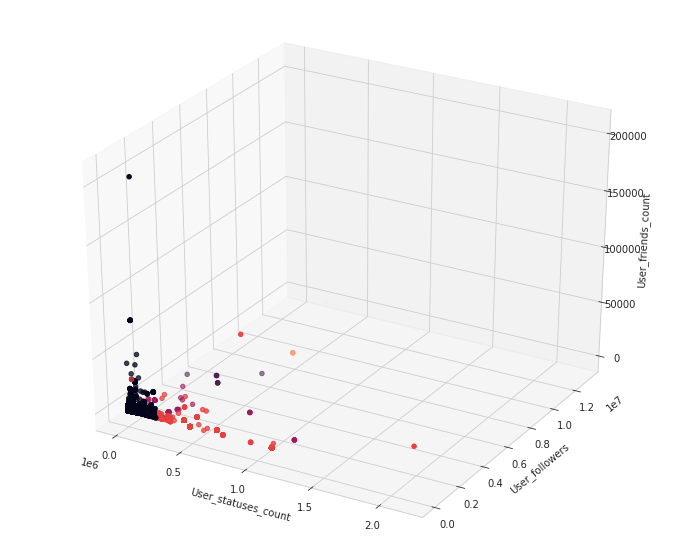

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
threedee = plt.figure(figsize=(12,10)).gca (projection='3d')
threedee.scatter (pddf_pred.User_statuses_count, pddf_pred. User_followers, pddf_pred. user_friends_count, c=pddf_pred.cluster)
threedee.set_xlabel('User_statuses_count')
threedee.set_ylabel('User_followers')
threedee.set_zlabel('User_friends_count')
plt.show()

In [ ]:
spark.stop()